In [1]:
#
# train a simple TensorFlow model to perform binary classification on a generated
# 2-dimensional dataset 
# 02/2023
# 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-04-10 09:59:44.750358: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 09:59:44.898516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Generate toy data
np.random.seed(4321)
n_samples = 1000

machine learning algorithms need data close to 1 , this generated here, it is not needed to normalize data

In [4]:
class1_data = np.random.multivariate_normal([-1., -1.], [[1., 0.], [0., 1.]], n_samples)
class2_data = np.random.multivariate_normal([1.0, 1.0], [[1., 0.], [0., 1.]], n_samples)

In [5]:
# the data is merged together and the toy labels are asigned as [1, 0]   and  [0,1]
train_data = np.concatenate([class1_data, class2_data])
toy_labels = np.zeros(train_data.shape)
toy_labels[:n_samples, 0] = 1
toy_labels[n_samples:, 1] = 1

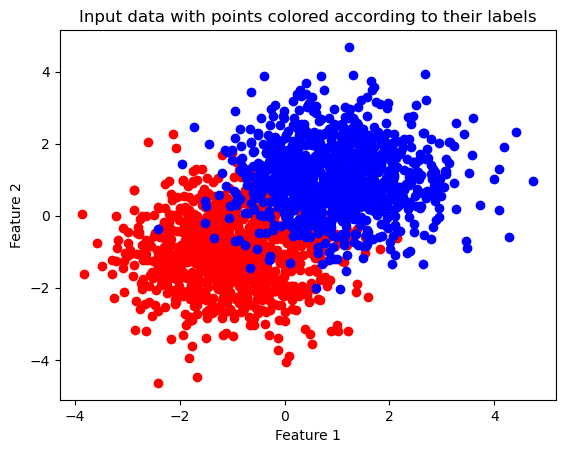

In [6]:
# Plot the input data with points colored according to their labels
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='red')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='blue')
plt.title("Input data with points colored according to their labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Build a model, the sequential model is a linear stack of pre-made layers. In a Dense layer all neueral network layer is connected with all other layers. Here we have 32 nodes with input_shape 2 with means 2 dimensional data. The activation is 'relu' (rectified linear unit)
Softmax maps the output of a model to probability distributions of the 2 classes. 

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

Adam optimizer is a gradient-based optimization algorithm for updating the weights in 
a neural network. The leanrning rate depends on the first and second moments of the 
gradients of the loss function with respect to the weights
The loss function is BinaryCrossentropy since we have 2 classes of data
The accuracy metric measures the percentage of instances where the model 
correctly predicted the class label and it can be computed as the number of correct
predictions divided by the total number of instances in the test set.

In [8]:
model.compile(optimizer='adam',
#             loss=tf.keras.losses.CategoricalCrossentropy(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

The object history contains loss and accuracy from the training process
The model is trained by dividing the entire training data into smaller batches
of a specified size, updating the model's parameters after each batch.
The batch_size parameter determines the number of samples to be used in each batch. 

In [9]:
history = model.fit(train_data, toy_labels, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
63/63 [==============================] - 1s 1ms/step - loss: 0.4969 - accuracy: 0.8230
Epoch 2/20
63/63 [==============================] - 0s 998us/step - loss: 0.2490 - accuracy: 0.9220
Epoch 3/20
63/63 [==============================] - 0s 975us/step - loss: 0.1960 - accuracy: 0.9255
Epoch 4/20
63/63 [==============================] - 0s 929us/step - loss: 0.1912 - accuracy: 0.9260
Epoch 5/20
63/63 [==============================] - 0s 961us/step - loss: 0.1901 - accuracy: 0.9265
Epoch 6/20
63/63 [==============================] - 0s 949us/step - loss: 0.1901 - accuracy: 0.9260
Epoch 7/20
63/63 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9265
Epoch 8/20
63/63 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9265
Epoch 9/20
63/63 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9265
Epoch 10/20
63/63 [==============================] - 0s 995us/step - loss: 0.1884 - accuracy: 0.9245
Epoch 1

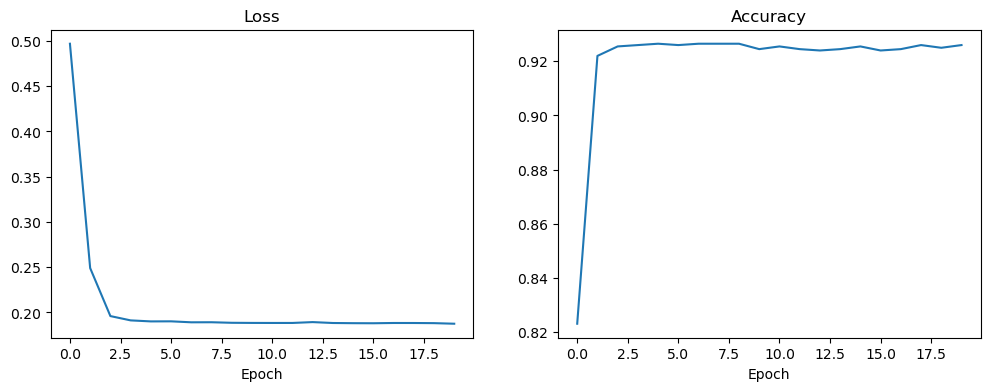

In [10]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [11]:
# Plot data points and decision boundary
x_min, x_max = train_data[:, 0].min() - .5, train_data[:, 0].max() + .5
y_min, y_max = train_data[:, 1].min() - .5, train_data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# creating a 2D grid from the arrays xx and yy which is the area of our inputs 
grid = np.c_[xx.ravel(), yy.ravel()]
# get the predicted class probabilities for each data point in the grid.
# The result Z is an array with shape (n_samples, n_classes) where n_samples
# is the number of data points in the grid and n_classes is the number of
# classes in the toy_labels. Z contains the predicted class probabilities
# for each data point in the grid.
Z = model.predict(grid)
# The line Z = np.argmax(Z, axis=1) is used to convert the predicted probabilities
# into class labels.
Z = np.argmax(Z, axis=1)
# reshaped Z variable is used to create the contour plot of the model's predictions 
# on the grid.
Z = Z.reshape(xx.shape)


7772/7772 [==============================] - 5s 661us/step


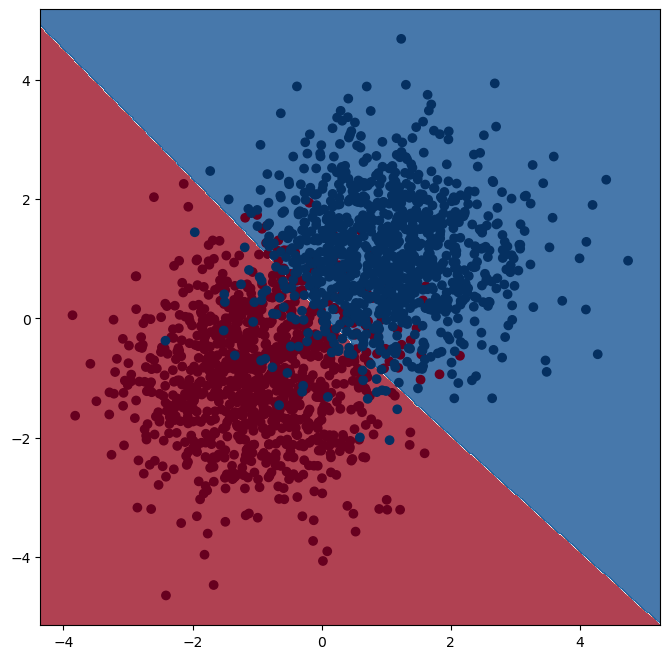

In [12]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=np.argmax(toy_labels, axis=1), cmap=plt.cm.RdBu)

plt.show()